In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [4]:
# Load data
df = pd.read_csv('data.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].median(), inplace=True)
df.drop(columns=['customerID'], errors='ignore', inplace=True)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [6]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [22]:
# Correlation heatmap (add this block)
import matplotlib.pyplot as plt
import seaborn as sns

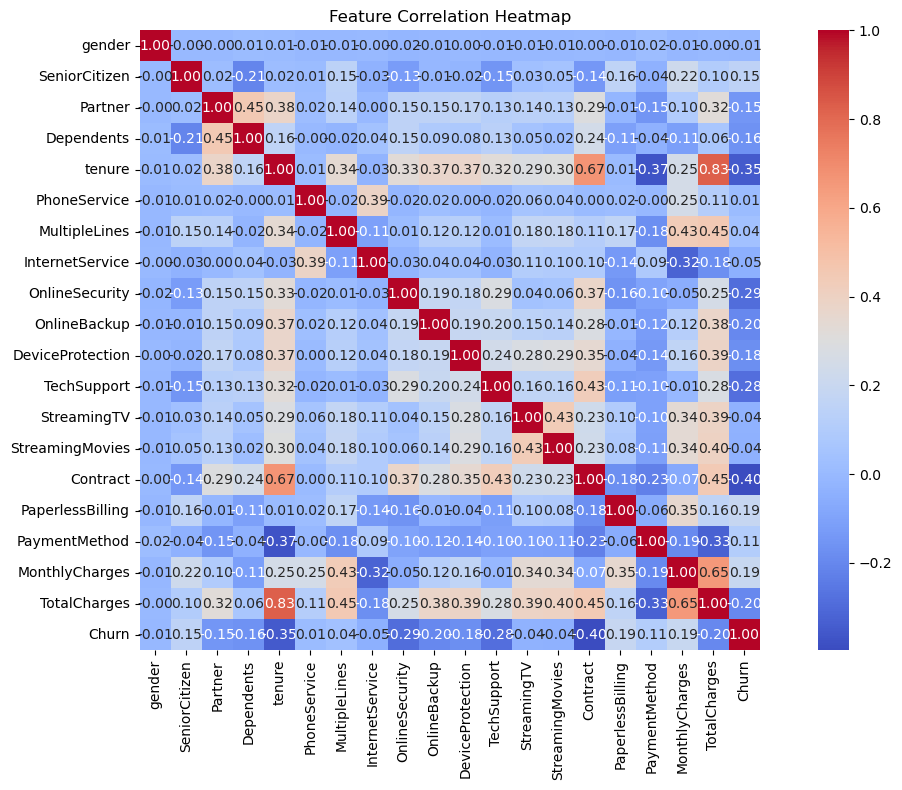

In [24]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
# End of correlation heatmap

In [8]:
# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define evaluation function
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [14]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [16]:
# Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [18]:
# Evaluate
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

Evaluation for Random Forest:
Accuracy: 0.7955997161107168
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Evaluation for XGBoost:
Accuracy: 0.794180269694819
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



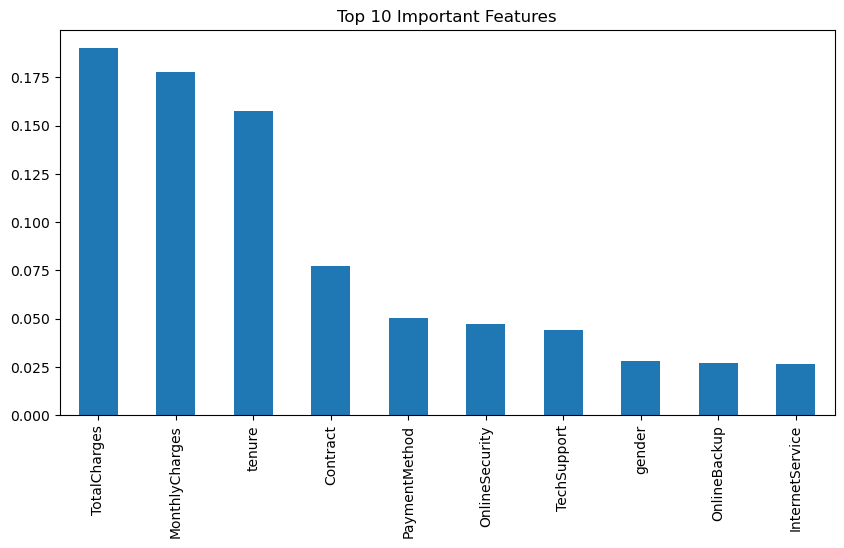

In [20]:
# Plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feature_importance[:10].plot(kind='bar', title='Top 10 Important Features')
plt.show()